In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# 天气数据集

包含14个天气相关的特征

In [2]:
# zip_path = tf.keras.utils.get_file(
#     origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
#     fname='jena_climate_2009_2016.csv.zip',
#     extract=True)
# csv_path, _ = os.path.splitext(zip_path)
csv_path = 'E:/jupyther/tensorflow/document/jena_climate_2009_2016.csv'

In [3]:
df = pd.read_csv(csv_path)
df = df[5::6]#从第6行开始,每隔6个取一个行记录
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S') #时间处理函数

In [4]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


### 展示部分特征跟随时间的转变

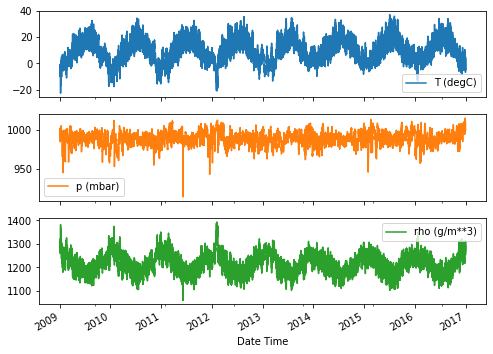

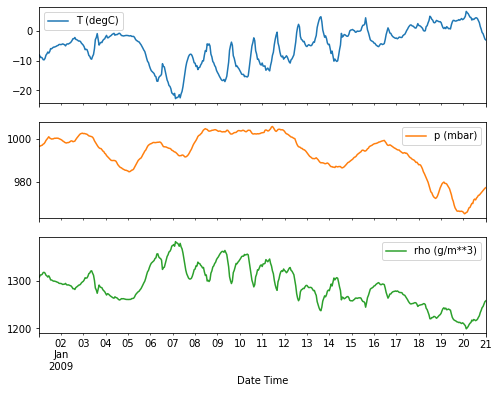

In [5]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

### 检查和清除数据

In [6]:
df.describe().transpose()#transpose:将行和列互换

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


### 风速

风速是个代表性的数据,最小值达到了-9999,该值认为是一个错误的值,需把它替换为0

In [7]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0  # 可以将df切片赋值给变量,变量中更改某值原数据同步改变

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

df['wv (m/s)'].min()

0.0

# 特征工程

确保特征适合模型

## 风

风向并不是一个好的输入特征,0-360度, 需要平滑压缩,当没有风速是风向毫无意义

Text(0, 0.5, 'Wind Velocity [m/s]')

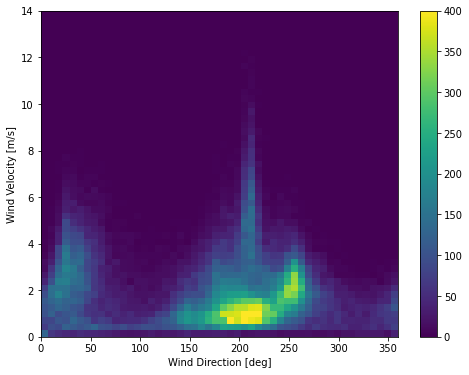

In [8]:
# 绘制风向与风速图像
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

风速和风向是风的矢量组成,将其拆解为标量

In [9]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

#风向由角度转换为弧度
wd_rad = df.pop('wd (deg)') * np.pi / 180

#计算两个基准方向的分量
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

#计算最大风速的分量
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

风的矢量分布对于模型有利于正确地解释

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

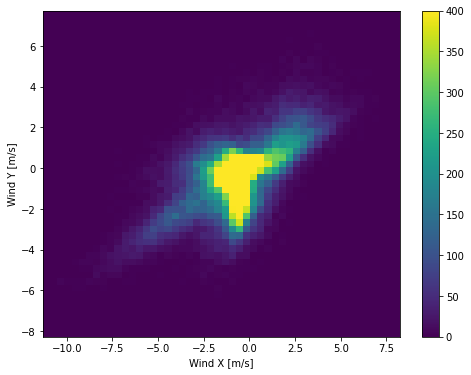

In [10]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

### 时间

时间非常有用,但并不是这种数据流的格式,把它转换为秒

In [11]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

把时间记为秒并不是一个好的输入,时间有日和年的周期.

本文使用正弦和余弦转换天和年

In [12]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

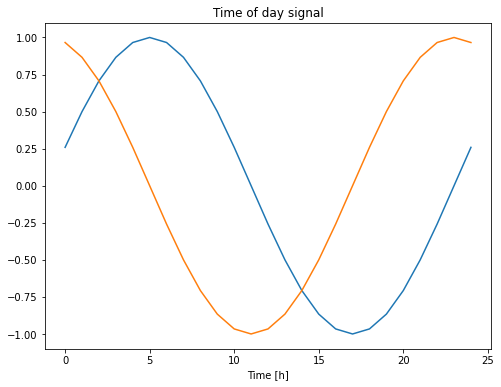

In [13]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

这就给了模型更为重要的频率信息.如果不知道是否存在频率信息,可采用快速傅里叶变换.

采用tf.signal.rfft分析温度对于时间的变化,注意到明显的峰值频率接近1/year和1/day

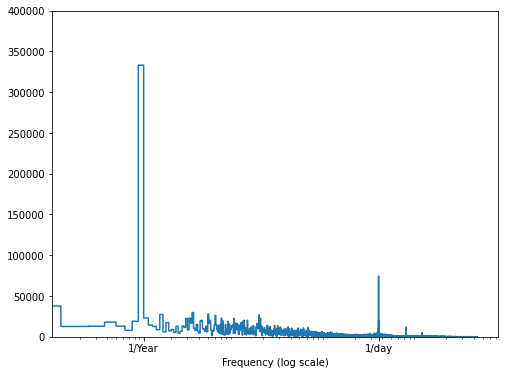

In [14]:
########################查看方法
fft = tf.signal.rfft(df['T (degC)'])#计算实值信号在输入的最内维上的一维离散傅里叶变换。
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

# 分割数据

70/20/10分别应用与训练集/验证集/测试集

需要注意的是数据不能打乱,它的周期特性也是重要特征之一,要保证数据的连续性

In [15]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

# 标准化数据

训练集/验证集/测试集应该有不同的均值和方差,但是本文简单处理,均已训练集为准

更好的方式的采用移动平均,但本教程仅使用简单平均

In [16]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

### 查看各特征的数值分布

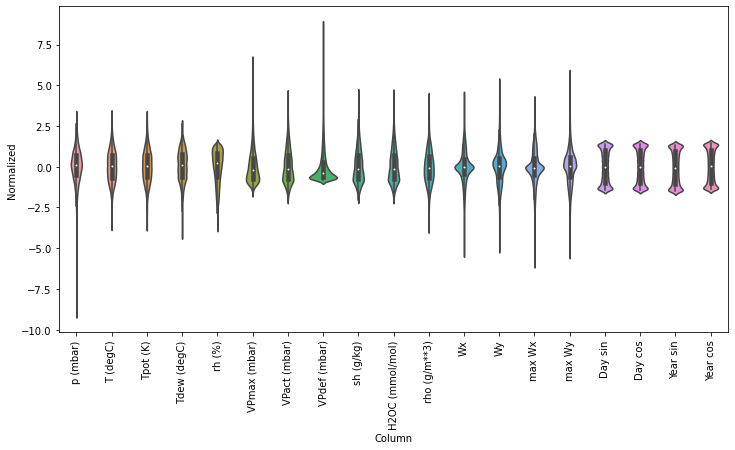

In [17]:
############## 查看方法
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## 数据窗口

1.处理插入值与偏移量

2.分割窗口为特征和标签

3.画出输出窗口的内容

4.有效输出训练集/验证集/测试集批量窗口

### 1.插入值与偏移

创建WindowGenerator 类

In [18]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, 
                train_df=train_df, val_df=val_df, test_df=test_df,
                label_columns=None):
        
        # 存储原始数据
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        #解出输出列的索引
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i , name in 
                                         enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                              enumerate(train_df.columns)}
        
        #求解窗口参数
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        #窗口切片
        self.input_slice = slice(0, input_width) #slice:函数实现切片对象，主要用在切片操作函数里的参数传递。
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [19]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [20]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

### 2.分割

创建split_window方法将窗口分割为输入窗口和标签窗口

In [21]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)
    
    #切片不会保存数据静态维度,需要手动设定
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels

#类外定义成员方法
WindowGenerator.split_window = split_window

In [22]:
#堆叠三个层
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                          np.array(train_df[100:100+w2.total_window_size]),
                          np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


上述案例中设有三层数据,每层有7的时间步长(即窗口输入数据长度),每个时间步有19个特征

### 3.画图

简单地将分割窗口可视化

In [23]:
w2.example = example_inputs, example_labels

In [24]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col}[normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                label='Inputs', marker='.', zorder=-10)
        
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
            
        if label_col_index is None:
            continue
            
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                       marker='X', edgecolors='k', label='Predictions',
                       c='#ff7f0e', s=64)
        
        if n == 0:
            plt.legend()
    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

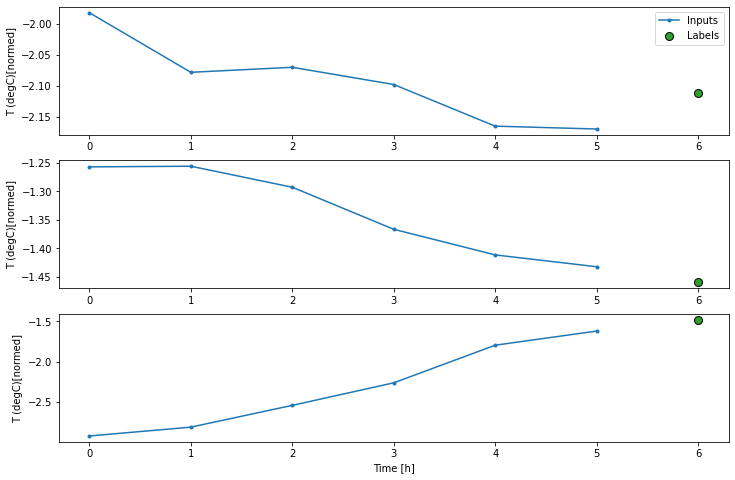

In [25]:
w2.plot()

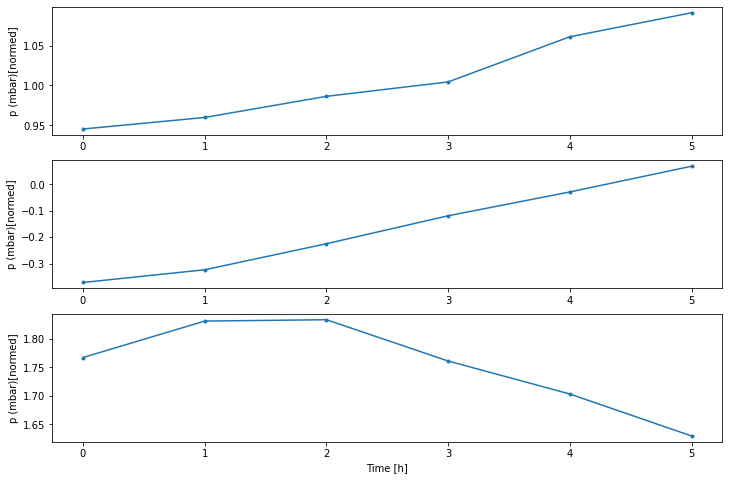

In [26]:
w2.plot(plot_col='p (mbar)')

### 创建 tf.data.Datasets

使用上述方法创建时间序列的数据帧,并转换为数据库

In [27]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32)
    
    ds = ds.map(self.split_window)
    
    return ds

WindowGenerator.make_dataset = make_dataset

WindowGenerator对象包含训练集/验证集/测试集,为使用之前定义的make_dataset方法s获取tf.data.Dataset添加属性

In [28]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """获取和储存画图时示例批量中的输入和标签"""
    result = getattr(self, '_example', None) #getattr() 函数用于返回一个对象属性值。
    if result is None:
        #没有批量找到,从训练集中找一个
        result = next(iter(self.train))
        #在下一个时间储存
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Dataset.element_spec属性将输出数据库元素的结构/数据类型/数据的型等

In [29]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

迭代数据库并凝聚为批次

In [30]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


## 单步模型

最简单的模型即是基于现有条件预测未来一个时间单位的值.

In [31]:
#创建一个WindowGenerator对象,生成单步(输入, 标签)对
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [32]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


### 基线

为了与更复杂的模型形成对比,应该建立性能基础.

第一个任务就是利用当前给出的所有特征值预测未来一小时的温度.

开始时模型将当前温度作为预测值输出是合理的,可作为基础数值,因为温度变化缓慢,但在预测未来的未来时会出现问题.

In [33]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]#tf.newaxis的主要用途是增加一个维度，位置不同，增加的维度是第几维也相对不一样，可以解决用训练好的神经网络模型进行预测时的维度不匹配问题。

实例化和评估模型

In [34]:
baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 1s 604us/step - loss: 0.0128 - mean_absolute_error: 0.0785


模型的优劣需要对比,但是单步的预测并不直观,可创建更宽的 WindowGenerator生成24小时连续时间的输入和输出,创建新的名为wide_window的WindowGenerator对象,时间轴理解为批量.

In [35]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

扩展窗口可以直接使用同一个baseline模型,不需要任何代码改动,因为输入和标签有着相同的时间序列, 同时基线也是输入与输出的直接传递.

In [36]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


基线的预测,可看出标签只是输入平移了一个时间单位

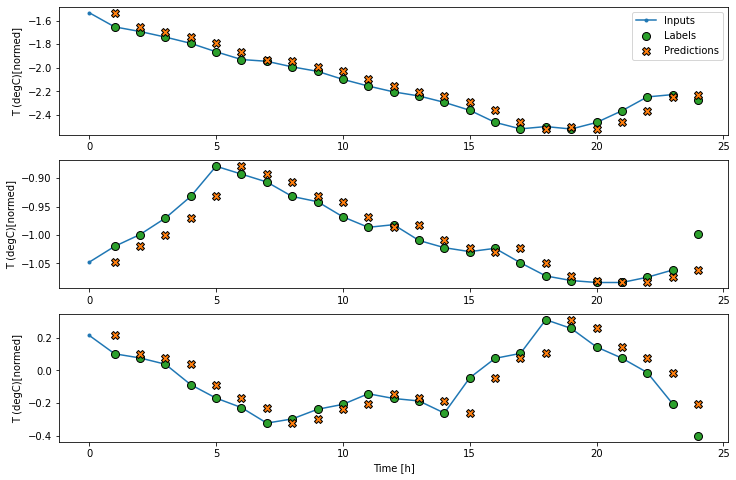

In [37]:
wide_window.plot(baseline)

## 线性模型

在输入与输出间使用线性转变.

在线性模型中不需要激活函数,层中只会将(batch, time, inputs)最后一个维度转换为 (batch, time, units);从每个个体中独立地获取batch and time 轴.

In [38]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [39]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [40]:
#将训练程序封装在一个函数中
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=patience,
                                                     mode='min')
    
    model.compile(loss=tf.losses.MeanSquaredError(),
                 optimizer=tf.optimizers.Adam(),
                 metrics=[tf.metrics.MeanAbsoluteError()])
    
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                       validation_data=window.val,
                       callbacks=[early_stopping])
    
    return history

In [41]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 2s 885us/step - loss: 0.0732 - mean_absolute_error: 0.1752 - val_loss: 0.0106 - val_mean_absolute_error: 0.0768
Epoch 2/20
1534/1534 [==============================] - 1s 748us/step - loss: 0.0101 - mean_absolute_error: 0.0744 - val_loss: 0.0093 - val_mean_absolute_error: 0.0718
Epoch 3/20
1534/1534 [==============================] - 1s 786us/step - loss: 0.0096 - mean_absolute_error: 0.0722 - val_loss: 0.0091 - val_mean_absolute_error: 0.0706
Epoch 4/20
1534/1534 [==============================] - 1s 782us/step - loss: 0.0095 - mean_absolute_error: 0.0716 - val_loss: 0.0090 - val_mean_absolute_error: 0.0699
Epoch 5/20
1534/1534 [==============================] - 1s 752us/step - loss: 0.0094 - mean_absolute_error: 0.0712 - val_loss: 0.0090 - val_mean_absolute_error: 0.0697
Epoch 6/20
1534/1534 [==============================] - 1s 774us/step - loss: 0.0093 - mean_absolute_error: 0.0708 - val_loss: 0.0088 - val_mean_absolute_error:

In [42]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


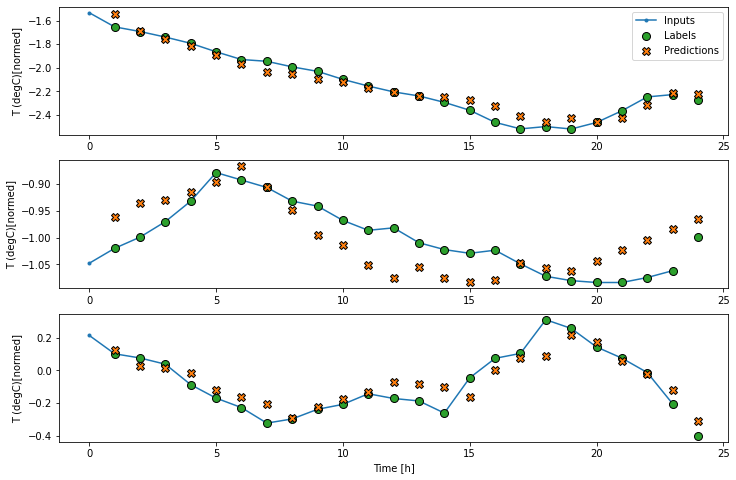

In [43]:
wide_window.plot(linear)

线性模型容易解释,将每个特征的权重可视化

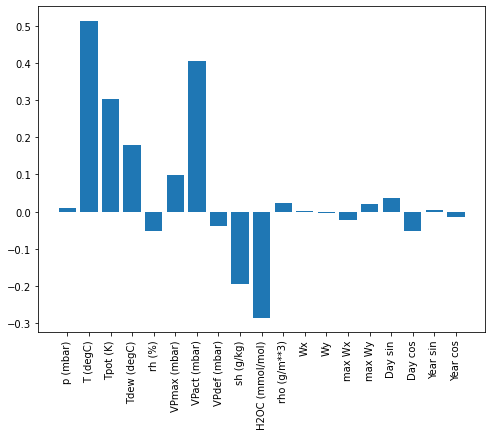

In [44]:
plt.bar(x=range(len(train_df.columns)),
       height=linear.layers[0].kernel[:, 0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### 全连接层

在尝试多时间步的模型之前,更应该检测更深层次的单步时间模型,本部分采用多层的全连接层.

In [45]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 3s 1ms/step - loss: 0.0158 - mean_absolute_error: 0.0772 - val_loss: 0.0075 - val_mean_absolute_error: 0.0631
Epoch 2/20
1534/1534 [==============================] - 1s 958us/step - loss: 0.0077 - mean_absolute_error: 0.0635 - val_loss: 0.0073 - val_mean_absolute_error: 0.0621
Epoch 3/20
1534/1534 [==============================] - 1s 931us/step - loss: 0.0074 - mean_absolute_error: 0.0620 - val_loss: 0.0068 - val_mean_absolute_error: 0.0595
Epoch 4/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0072 - mean_absolute_error: 0.0610 - val_loss: 0.0070 - val_mean_absolute_error: 0.0613
Epoch 5/20
439/439 [==============================] - 0s 809us/step - loss: 0.0070 - mean_absolute_error: 0.0614


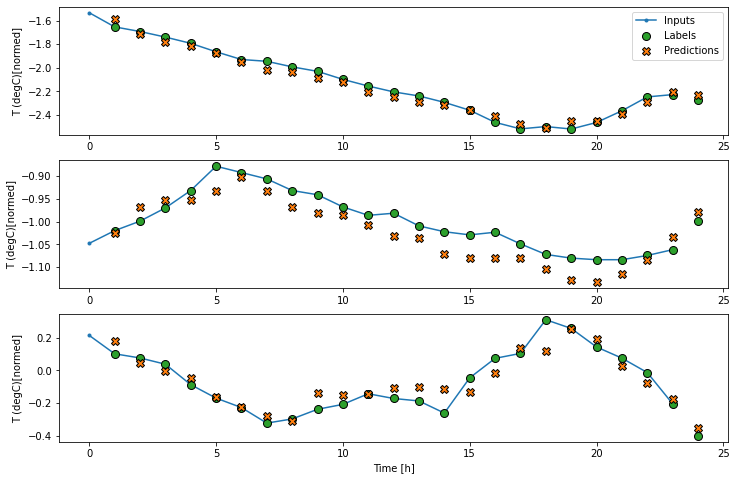

In [46]:
wide_window.plot(dense)

### 多时间步的全连接层

单时间步模型对当前输入的值无直接联系,它不能体现输入特征如何跟随时间变化.为了解决这个问题,需要构建多时间步的模型.

In [47]:
#创建一个 WindowGenerator 具备三小时批次的输入和一个小时的输出
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

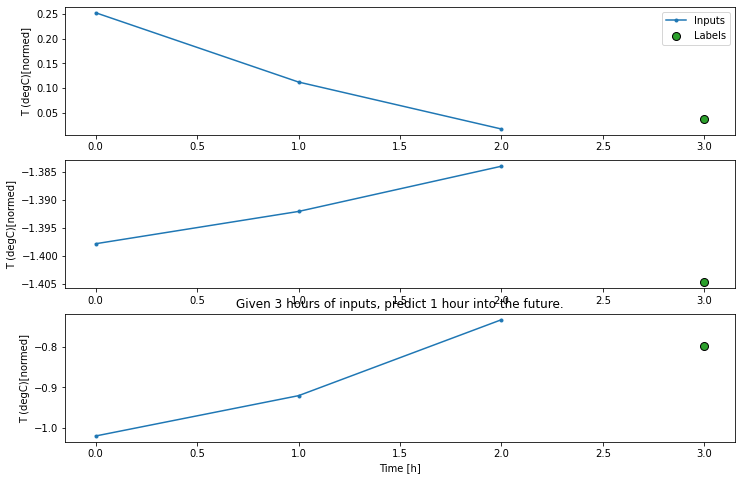

In [48]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [49]:
multi_step_dense = tf.keras.Sequential([
    #型从(time, features)变为(time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    #添加过去时间维度,型由(outputs)改为(1, outputs)
    tf.keras.layers.Reshape([1, -1])
])

In [50]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [51]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 0s 676us/step - loss: 0.0065 - mean_absolute_error: 0.0565


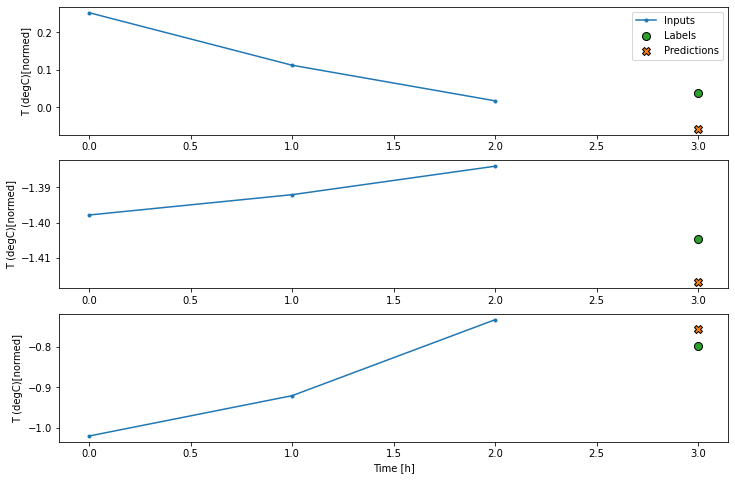

In [52]:
conv_window.plot(multi_step_dense)

In [53]:
print('Input shape: ', wide_window.example[0].shape)
try:
    print('Output shape: ', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}: {e}')

Input shape:  (32, 24, 19)

ValueError: Input 0 of layer dense_4 is incompatible with the layer: expected axis -1 of input shape to have value 57 but received input with shape (32, 456)


上述模型最主要的缺点是只能处理特定维度的输入窗口,否则将会报错,使用卷积神经网络可以避免这一问题.

### 卷积神经网络

(tf.keras.layers.Conv1D)也可以在每一个预测中将多时间步作为输入,下面的模型与multi_step_dense类似,但重写为卷积

In [54]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                          kernel_size=(CONV_WIDTH, ),
                          activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [55]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [56]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 0s 847us/step - loss: 0.0065 - mean_absolute_error: 0.0572


该模型与multi_step_dense模型有着相似的性能,不同点在于该模型可以应用在任意维度的输入,它是输入的滑动窗口

In [57]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


可以看到标签和输出维度不一致,为了使其一致,应当在创建WindowGenerator时对输入增加额外的维度.

In [58]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

In [59]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


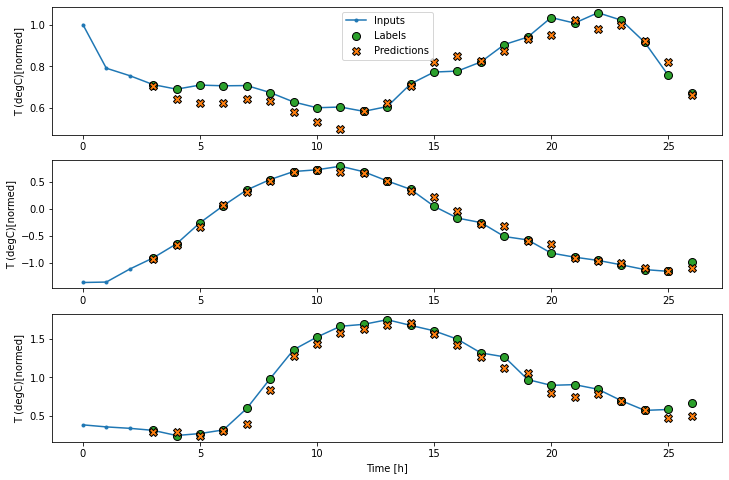

In [60]:
wide_conv_window.plot(conv_model)

# 循环神经网络

循环神经网络可以更好地适应时间序列数据,一步一步处理时序诗句,并一步一步维持内部的时序状态.

LSTM中return_sequences设置两种编译方式:

1/如果为否,只返回最后时间步的输出;
2/如果为是,返回每一个时间步的输出

In [61]:
lstm_model = tf.keras.models.Sequential([
    #型从[batch, time, features] 变为[batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    #型变为[batch, time, features]
    tf.keras.layers.Dense(units=1)
])

return_sequences为是,所以模型可以一次输出24小时的数据

In [62]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


In [63]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 1s 2ms/step - loss: 0.0056 - mean_absolute_error: 0.0515


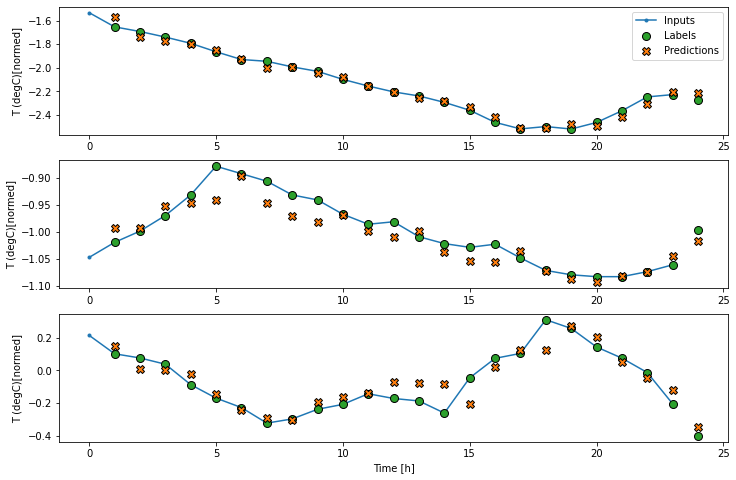

In [64]:
wide_window.plot(lstm_model)

### 表现

在这个数据集上每个模型性能依次有所提升

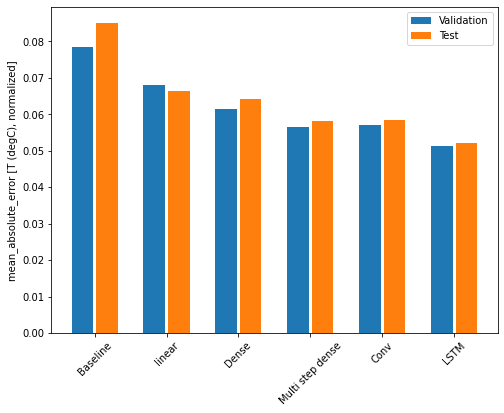

In [65]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [66]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0852
linear      : 0.0665
Dense       : 0.0643
Multi step dense: 0.0581
Conv        : 0.0584
LSTM        : 0.0522


# 多输出模型

上述模型是单时间步/单输出,但上述模型均可通过转换输出层的单元转换为多时间步.

In [67]:
single_step_window = WindowGenerator(
    #如果不设置label_columns参数,WindowGenerator返回所有特征作为标签
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 19)
Labels shape (batch, time, features): (32, 24, 19)


可以看到上述标签特征列与输入有了相同的维度

### 基本线

采用和之前一样的模型,但是将特征全作为标签并非特定的列

In [68]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                metrics=[tf.metrics.MeanAbsoluteError()])

In [69]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 0s 572us/step - loss: 0.0886 - mean_absolute_error: 0.1589


### Dense

In [70]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [71]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 0s 781us/step - loss: 0.0681 - mean_absolute_error: 0.1304


### RNN

In [72]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

438/438 [==============================] - 1s 2ms/step - loss: 0.0617 - mean_absolute_error: 0.1207

Wall time: 2min 18s


# 进阶:剩余连接

认为天气的改变是不大的,之前初始化为零,未用到初始值,本章以上一时间的值作为初值,通过模型计算出偏差,相加即可.,

In [73]:
class ResidualWrapper(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model
        
    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)
        
        return inputs + delta

In [74]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

438/438 [==============================] - 1s 2ms/step - loss: 0.0624 - mean_absolute_error: 0.1185

Wall time: 1min 20s


### 表现

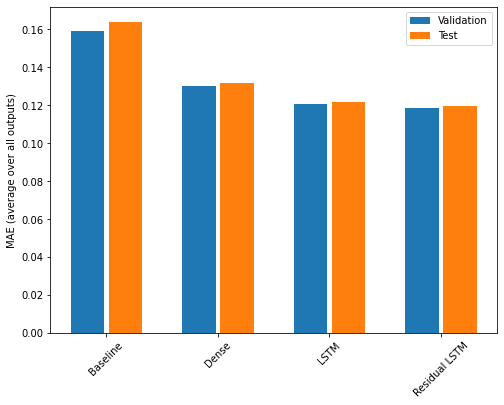

In [75]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [76]:
for name, value in performance.items():
    print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1638
Dense          : 0.1315
LSTM           : 0.1217
Residual LSTM  : 0.1197


# 多时间步模型

上述的模型无论是单步还是多输出,都是单时间步的预测,接下来扩展这些模型进行多时间步的预测.

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

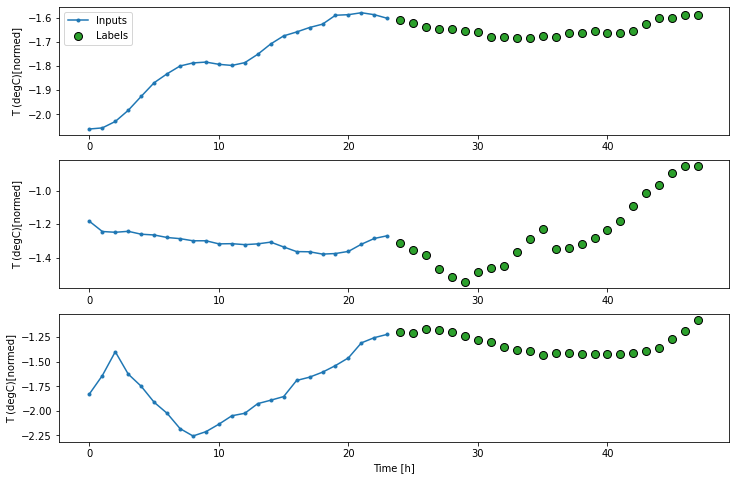

In [77]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24, 
                              label_width=OUT_STEPS,
                              shift=OUT_STEPS)

multi_window.plot()
multi_window

### 基本线

重复最后一个输入作为所有时间步的输出

437/437 [==============================] - 0s 632us/step - loss: 0.6285 - mean_absolute_error: 0.5007


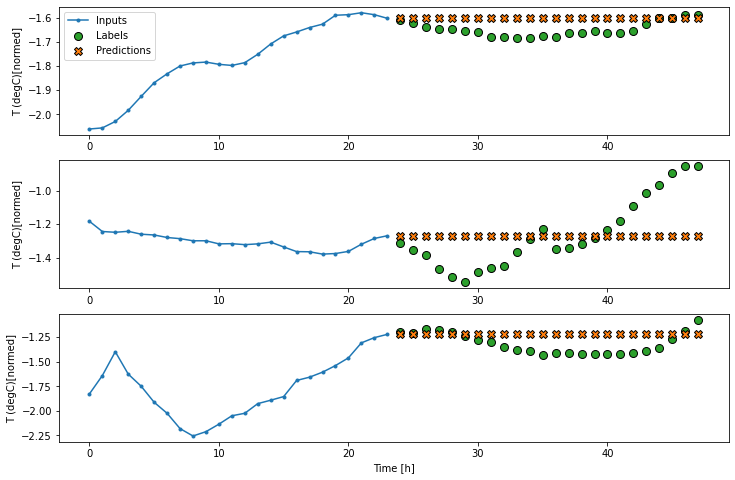

In [78]:
class MultiStepBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])#tile()函数是用来对张量(Tensor)进行扩展的，其特点是对当前张量内的数据进行一定规则的复制。
    
last_baseline = MultiStepBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                     metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['last'] = last_baseline.evaluate(multi_window.val)
multi_performance['last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

另外一种基础线的方式是重复过去24小时的状态

437/437 [==============================] - 0s 676us/step - loss: 0.4270 - mean_absolute_error: 0.3959


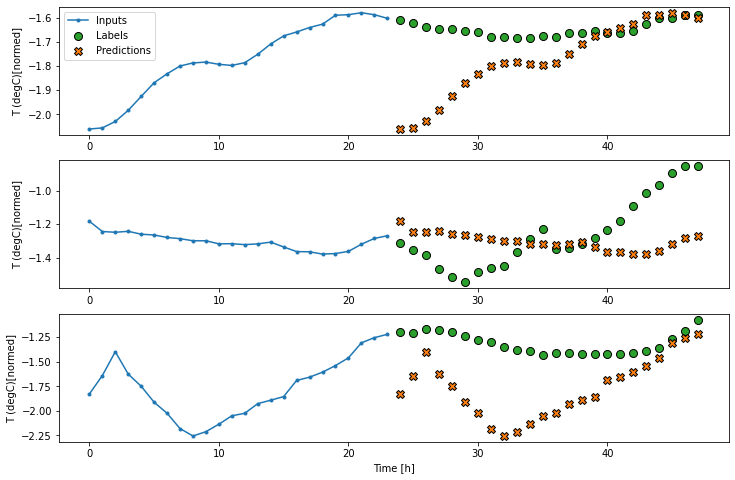

In [79]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                       metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### 单步映射模型

一次性输出24个小时的预测

利用Dense层输出OUT_STEPS*features 个输出单元.

### 线性模型

一个简单的线性模式是依据输入的最后一个时间步预测未来24小时

437/437 [==============================] - 0s 862us/step - loss: 0.2555 - mean_absolute_error: 0.3053


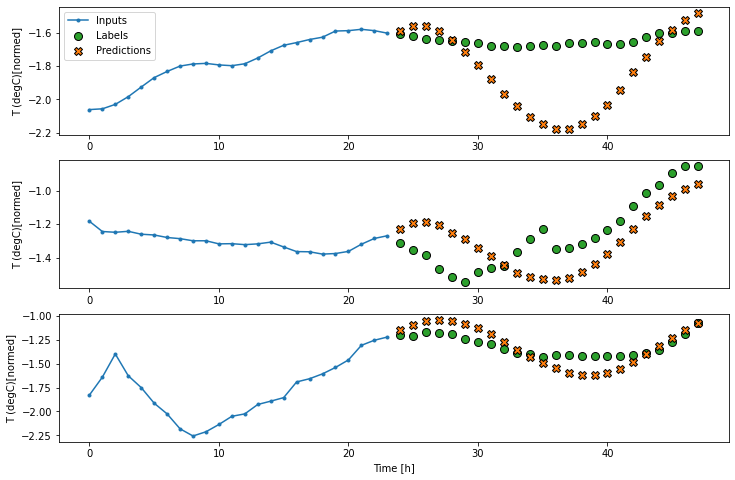

In [80]:
multi_linear_model = tf.keras.Sequential([
    #获取最后一个时间步,型由[batch, time, features] 转变为 [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    #型改为[batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                         kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### 全连接层

在输入与输出之间增加全连接层已增加模型的性能,但依然基于单时间步输入

437/437 [==============================] - 0s 994us/step - loss: 0.2205 - mean_absolute_error: 0.2831


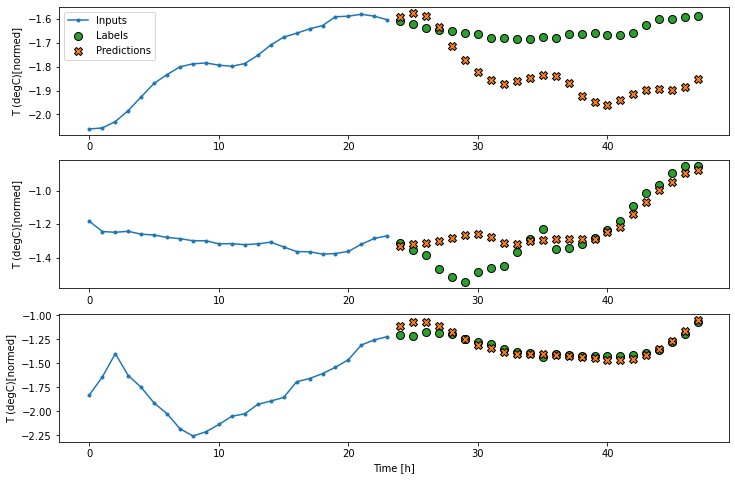

In [81]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### CNN

卷积模型预测依据固定时间宽度的历史数据,因它可以看到历史数据的变化具备更好的性能

437/437 [==============================] - 0s 992us/step - loss: 0.2172 - mean_absolute_error: 0.2839


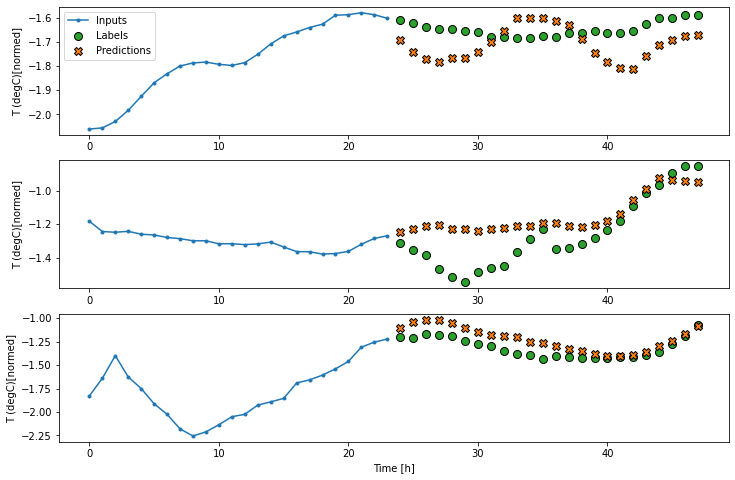

In [82]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

### RNN

在单步输出的RNN中,只需根据最后一步时间输出预测未来24小时,因此设置return_sequences=False

437/437 [==============================] - 1s 2ms/step - loss: 0.2137 - mean_absolute_error: 0.2848


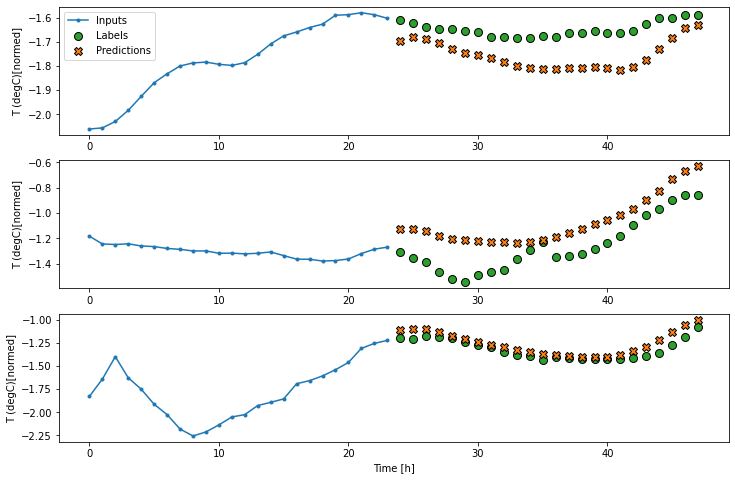

In [83]:
multi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                         kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

# RNN自回归模型

与之前的LSTM模型采用相同的架构;但LSTM层采用LSTMcell嵌套如更高层的RNN层中,本案例需手动管理每个时间步的输入,LSTMcell直接管理单步/低层的界面

In [84]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

In [85]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [86]:
def warmup(self, inputs):
    #输入的型为(batch, time, features),经过LSTM网络后传递给x (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)
    
    #预测的型为(batch, features)
    prediction = self.dense(x)
    return prediction, state

FeedBack.warmup = warmup

该方法返回单步的预测输出与LSTM内部参数

初始预测值可以结合模型迭代与每一步时间的输出作为输入;最简单的方式在循环之后用列表和 tf.stack收集输出预测值

In [87]:
def call(self, inputs, training=None):
    #使用数组张量获取动态非滚动输出
    predictions = []
    #初始化LSTM状态
    prediction, state = self.warmup(inputs)
    
    #嵌入第一个预测
    predictions.append(prediction)
    
    #运行剩下的预测步骤
    for n in range(1, self.out_steps):
        #将最后预测作为输入
        x = prediction
        #执行单步lstm
        x,state = self.lstm_cell(x, states=state,
                                training=training)
        #转换lstm输出给预测
        prediction = self.dense(x)
        #添加预测给输出
        predictions.append(prediction)
    
    #预测的型为(time, batch, features)
    predictions = tf.stack(predictions)
    #预测的型为(batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

FeedBack.call = call

In [88]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 19)


437/437 [==============================] - 1s 3ms/step - loss: 0.2246 - mean_absolute_error: 0.2977


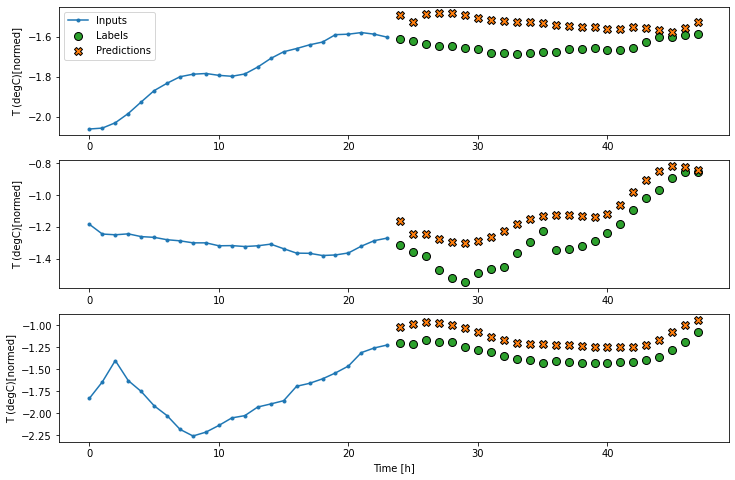

In [89]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

# 表现

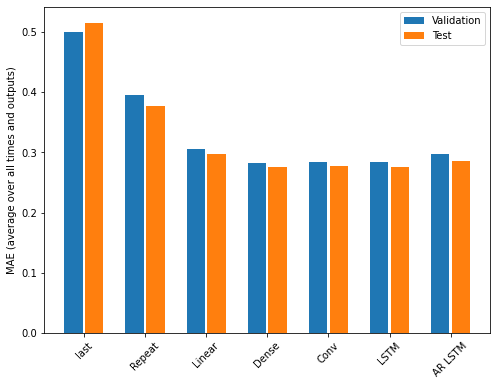

In [90]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [91]:
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')

last    : 0.5157
Repeat  : 0.3774
Linear  : 0.2980
Dense   : 0.2757
Conv    : 0.2776
LSTM    : 0.2757
AR LSTM : 0.2856
